# Movies Reviews EDA and NN Models for Sentiment Analysis


In [2]:
#Libraries imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
import os
os.getcwd()

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


'/Users/allorens/Desktop/IST736_Text_Mining/Project/data/aclImdb'

# Data sets reading 

In [111]:
#Reading the training and test data in Pandas
df_train = pd.read_csv("/Users/allorens/Desktop/IST736_Text_Mining/Project/data/aclImdb/train.csv", sep=",")
df_test = pd.read_csv("/Users/allorens/Desktop/IST736_Text_Mining/Project/data/aclImdb/test.csv", sep= ",")

In [112]:
df_train.head()

Unnamed: 0  label                                            reviews
0           0      1  For a movie that gets no respect there sure ar...
1           1      1  Bizarre horror movie filled with famous faces ...
2           2      1  A solid, if unremarkable film. Matthau, as Ein...
3           3      1  It's a strange feeling to sit alone in a theat...
4           4      1  You probably all already know this by now, but...

In [113]:
#drop Unnamed:0 column
df_train = df_train.drop(df_train.columns[[0]], axis=1)
df_train.head()

label                                            reviews
0      1  For a movie that gets no respect there sure ar...
1      1  Bizarre horror movie filled with famous faces ...
2      1  A solid, if unremarkable film. Matthau, as Ein...
3      1  It's a strange feeling to sit alone in a theat...
4      1  You probably all already know this by now, but...

In [114]:
df_train.isnull().values.any()

False

In [115]:
df_train.shape

(25000, 2)

In [116]:
df_test.head()

Unnamed: 0  label                                            reviews
0           0      1  Based on an actual story, John Boorman shows t...
1           1      1  This is a gem. As a Film Four production - the...
2           2      1  I really like this show. It has drama, romance...
3           3      1  This is the best 3-D experience Disney has at ...
4           4      1  Of the Korean movies I've seen, only three had...

### Data sets merging

In [117]:
#drop Unnamed:0 column
df_test = df_test.drop(df_test.columns[[0]], axis=1)
df_test.head()

label                                            reviews
0      1  Based on an actual story, John Boorman shows t...
1      1  This is a gem. As a Film Four production - the...
2      1  I really like this show. It has drama, romance...
3      1  This is the best 3-D experience Disney has at ...
4      1  Of the Korean movies I've seen, only three had...

In [118]:
df_test.isnull().values.any()

False

In [119]:
df_test.shape

(25000, 2)

# Exploratory Data Analysis (EDA)

In [120]:
m_reviews = pd.concat([df_train, df_test])
m_reviews.shape

(50000, 2)

In [121]:
m_reviews.head(-10)

label                                            reviews
0          1  For a movie that gets no respect there sure ar...
1          1  Bizarre horror movie filled with famous faces ...
2          1  A solid, if unremarkable film. Matthau, as Ein...
3          1  It's a strange feeling to sit alone in a theat...
4          1  You probably all already know this by now, but...
...      ...                                                ...
24985      0  Pauline Kael gave this movie a good review but...
24986      0  There must have been a lot of background info ...
24987      0  This is the worst movie I have seen to date. 8...
24988      0  My friends and I rented this movie mistaking i...
24989      0  I am a huge Randolph Scott fan, so I was surpr...

[49990 rows x 2 columns]

In [127]:
m_reviews_len = m_reviews
m_reviews_len['len']=m_reviews_len['reviews'].str.len()  # Store string length of each sample
df = m_reviews_len.sort_values(['len'], ascending=True)
df

label                                            reviews    len
22892      0                   Read the book, forget the movie!     32
22098      0          What a script, what a story, what a mess!     41
13367      0  I hope this group of film-makers never re-unites.     49
19272      0  Primary plot!Primary direction!Poor interpreta...     51
20149      0  This movie is terrible but it has some good ef...     52
...      ...                                                ...    ...
3795       1  Titanic directed by James Cameron presents a f...  10261
2240       1  Back in the mid/late 80s, an OAV anime by titl...  11989
5508       1  There's a sign on The Lost Highway that says: ...  12558
7420       1  (Some spoilers included:)  Although, many comm...  12730
1846       1  Match 1: Tag Team Table Match Bubba Ray and Sp...  13604

[50000 rows x 3 columns]

Text(0, 0.5, '1= pos, 0- neg')

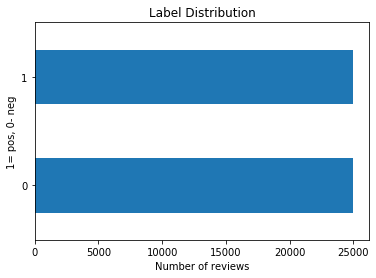

In [128]:
import matplotlib.pyplot as plt
ax = m_reviews['label'].value_counts(sort=False).plot(kind='barh')
ax.set_title ('Label Distribution' )
ax.set_xlabel('Number of reviews')
ax.set_ylabel('1= pos, 0- neg')

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


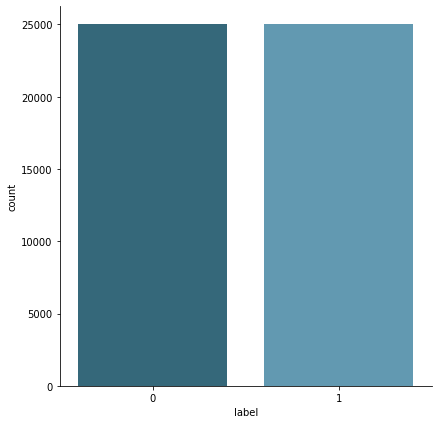

In [88]:
sns.factorplot(x="label", data=m_reviews, kind="count", size=6, aspect=1, palette="PuBuGn_d")
plt.show();

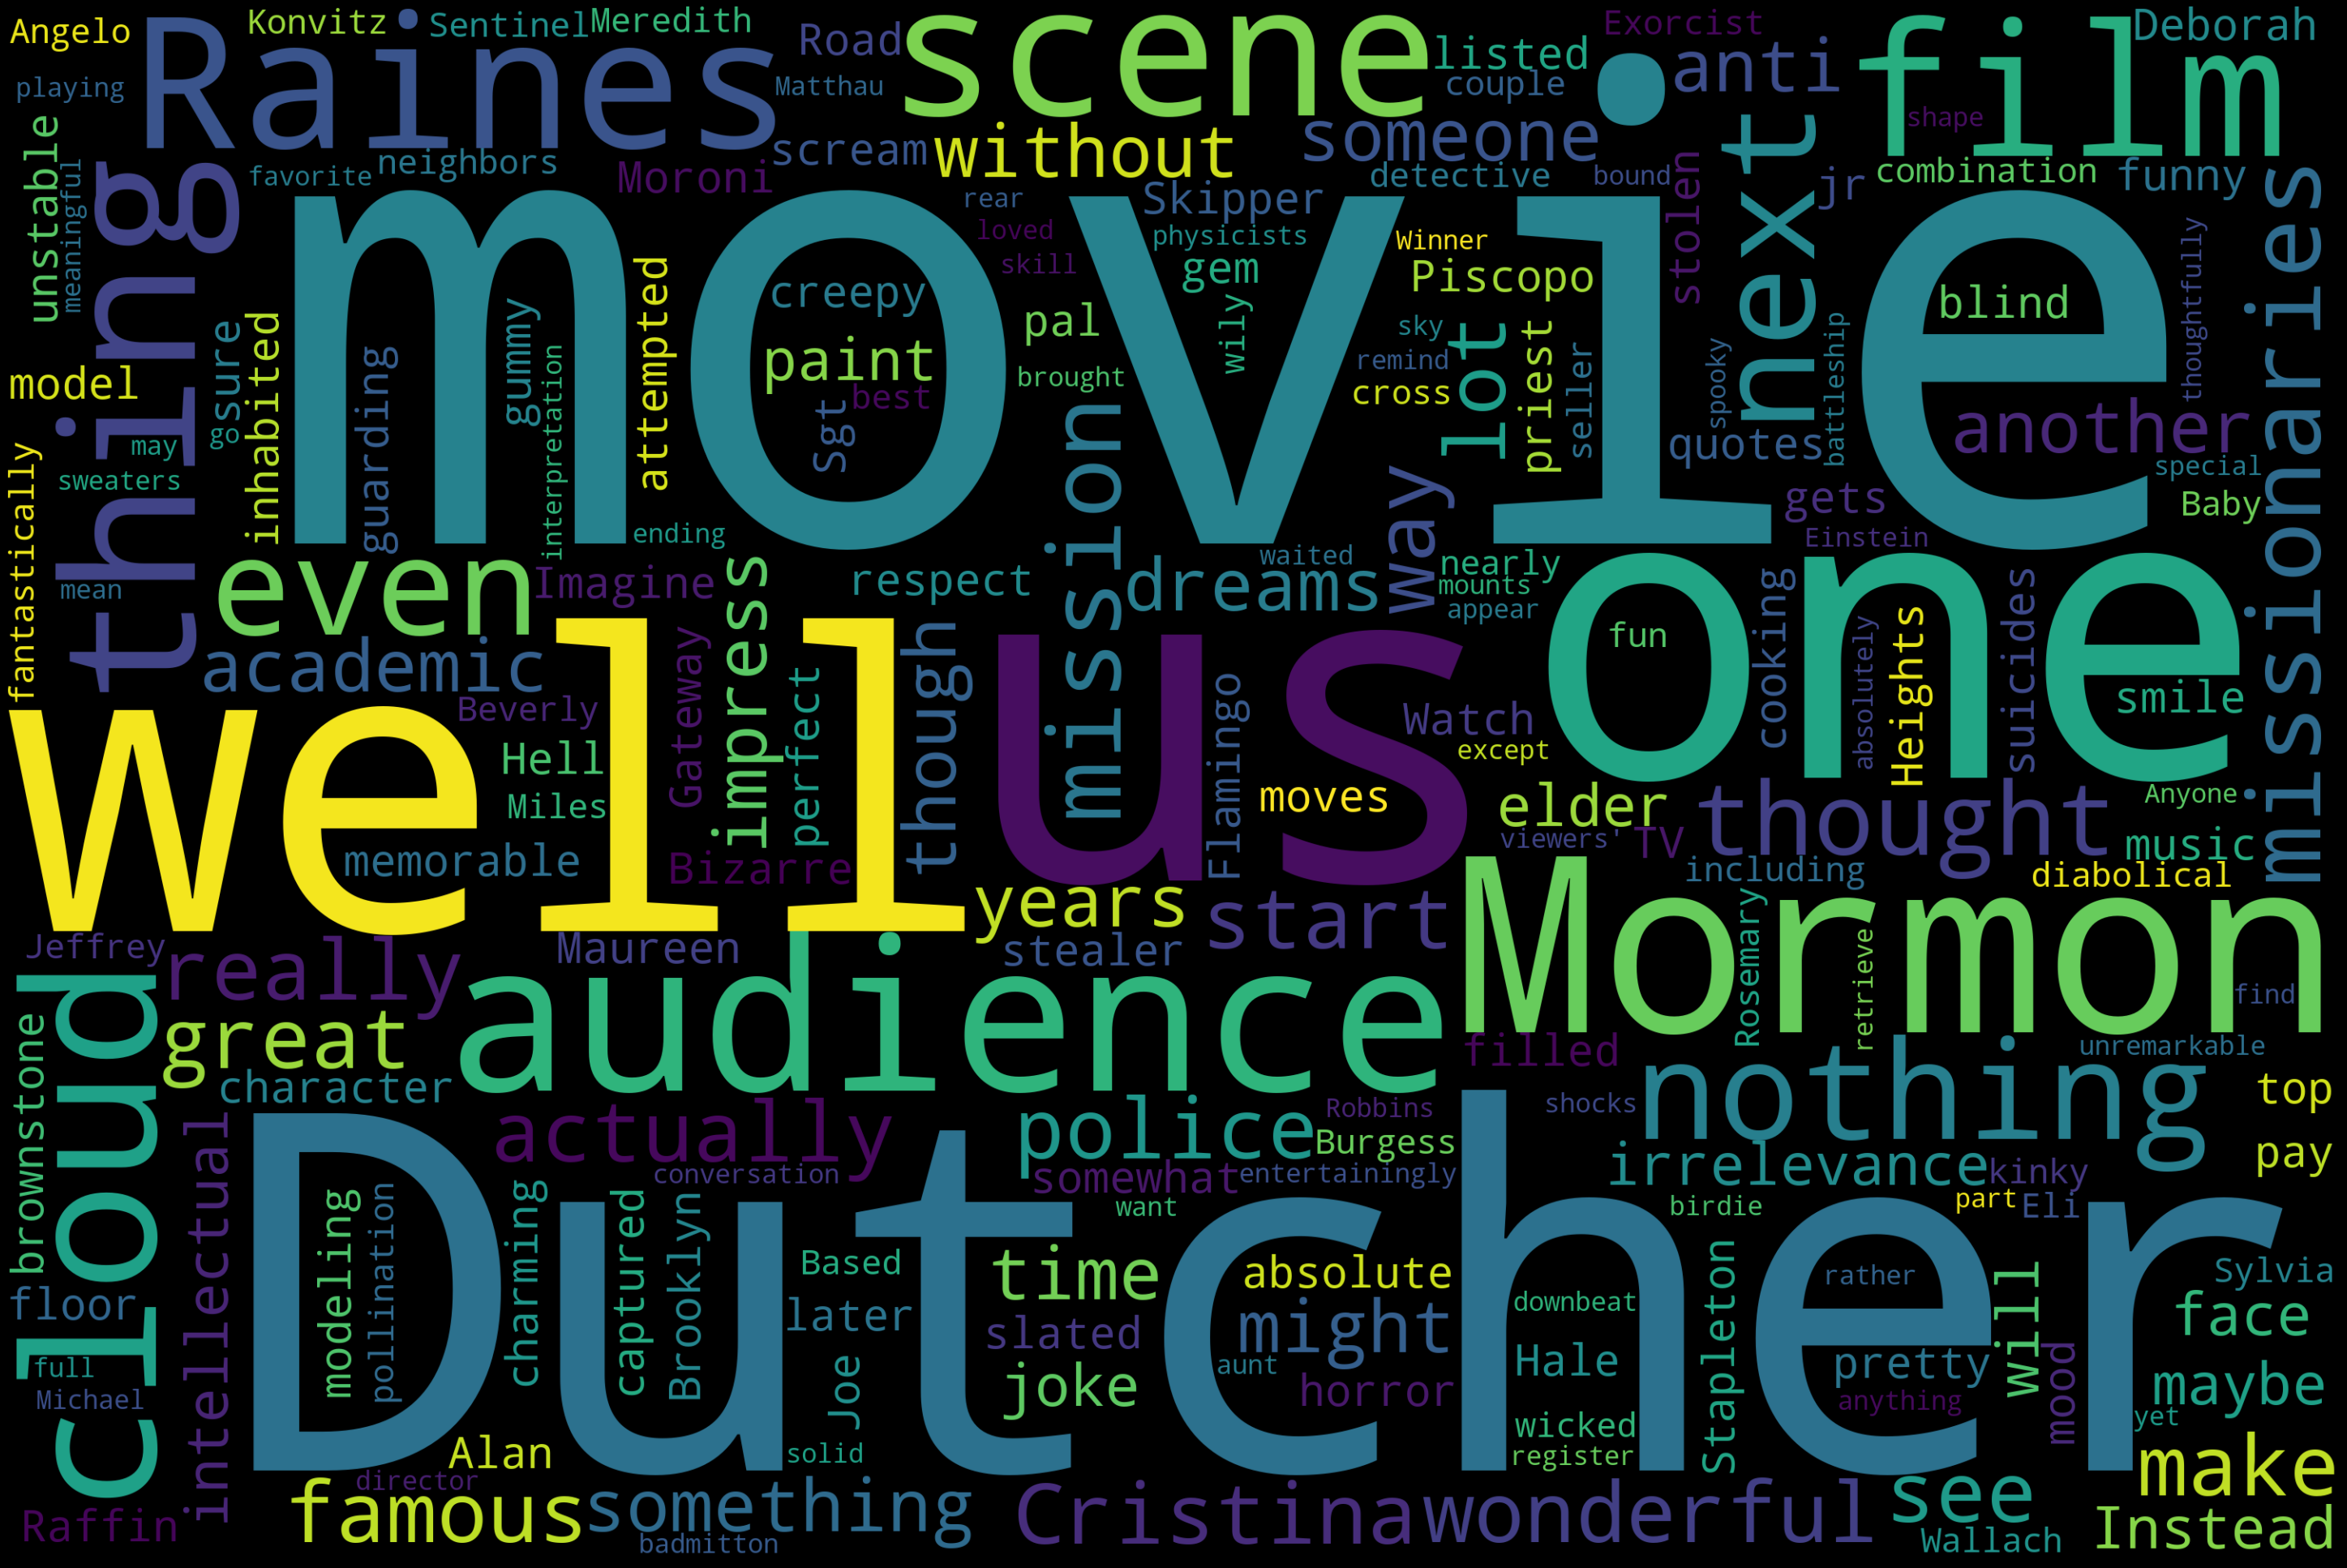

In [38]:
##Wordcloud from all reviews
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = m_reviews.reviews.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
#Checl any review in the train dataset
m_reviews["reviews"][5]

5    I saw the movie with two grown children. Altho...
5    this movie is funny funny funny my favorite qu...
Name: reviews, dtype: object

In [33]:
print (len(df_train["reviews"][5]))

503


In [92]:
#Build data frame with only positive reviews
pos_df = m_reviews[(m_reviews.label == 1)]
pos_df.head()

label                                            reviews   len
0      1  For a movie that gets no respect there sure ar...   284
1      1  Bizarre horror movie filled with famous faces ...  1033
2      1  A solid, if unremarkable film. Matthau, as Ein...   318
3      1  It's a strange feeling to sit alone in a theat...  2516
4      1  You probably all already know this by now, but...   783

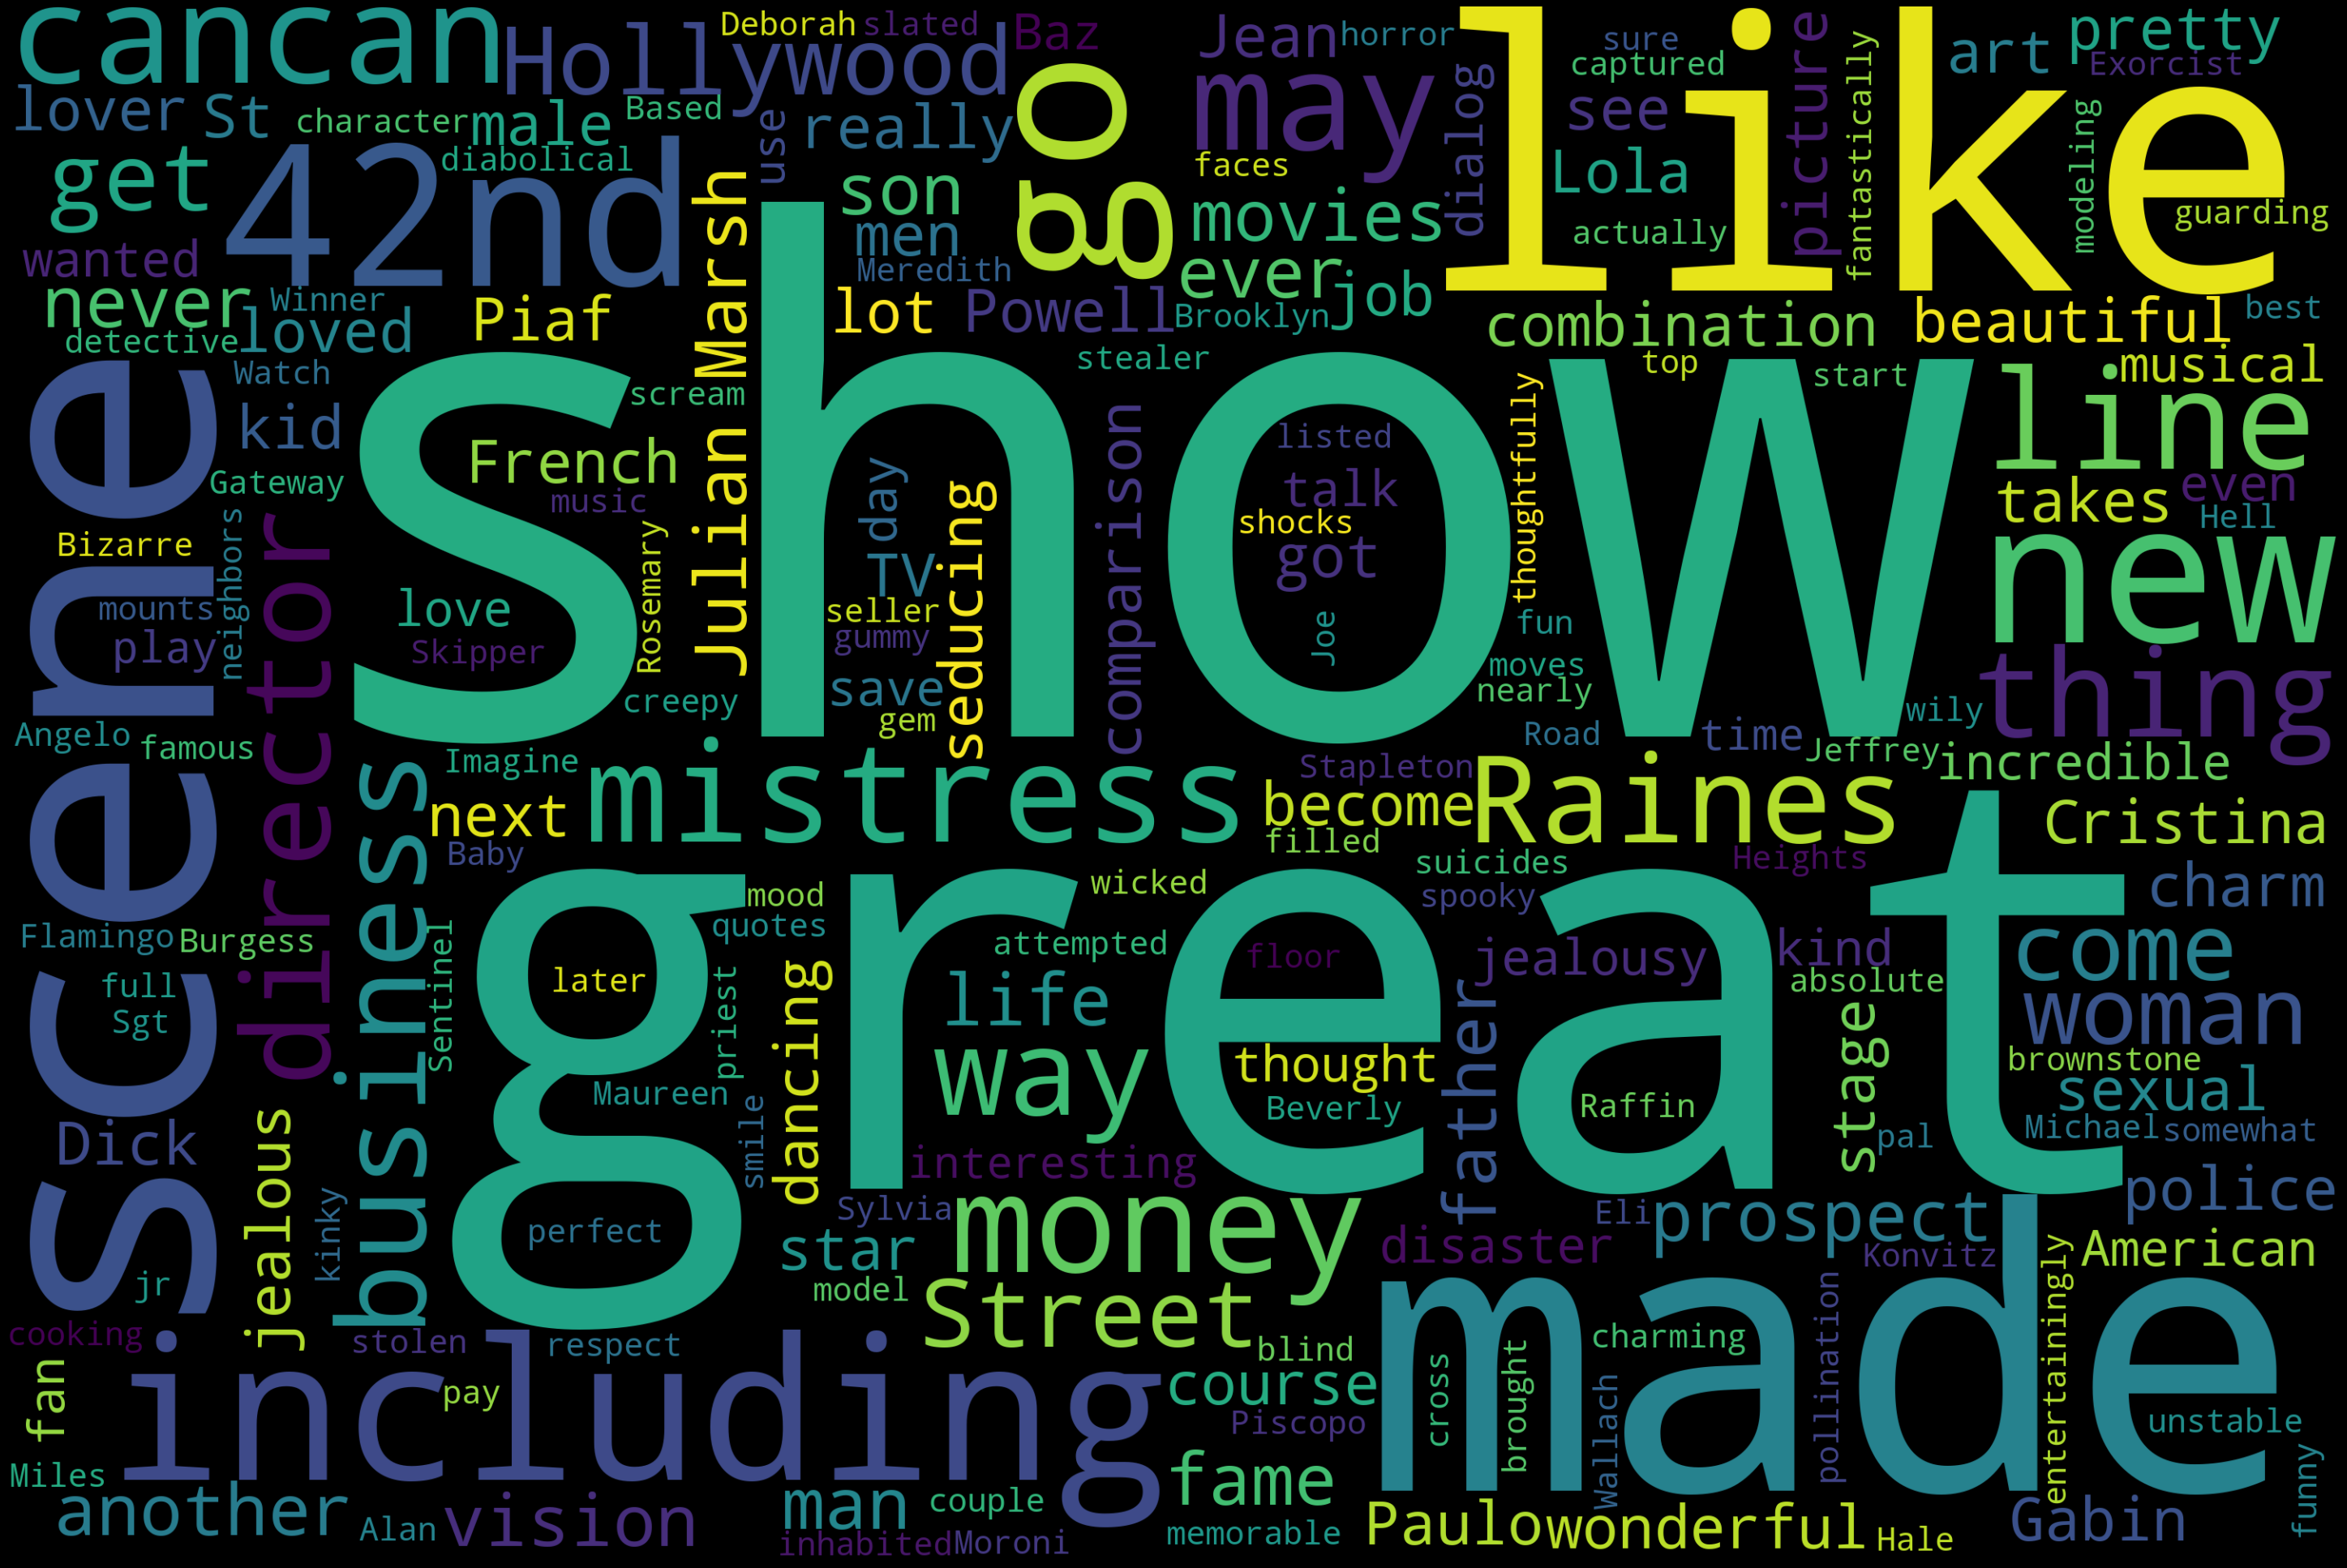

In [109]:
##Wordcloud from positive reviews
text = pos_df.reviews.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = sw).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [93]:
#Build data frame with only negative reviews
neg_df = m_reviews[(m_reviews.label == 0)]
neg_df.head()

label                                            reviews   len
12500      0  Working with one of the best Shakespeare sourc...   240
12501      0  Well...tremors I, the original started off in ...  1025
12502      0  Ouch! This one was a bit painful to sit throug...   681
12503      0  I've seen some crappy movies in my life, but t...  1924
12504      0  "Carriers" follows the exploits of two guys an...  4647

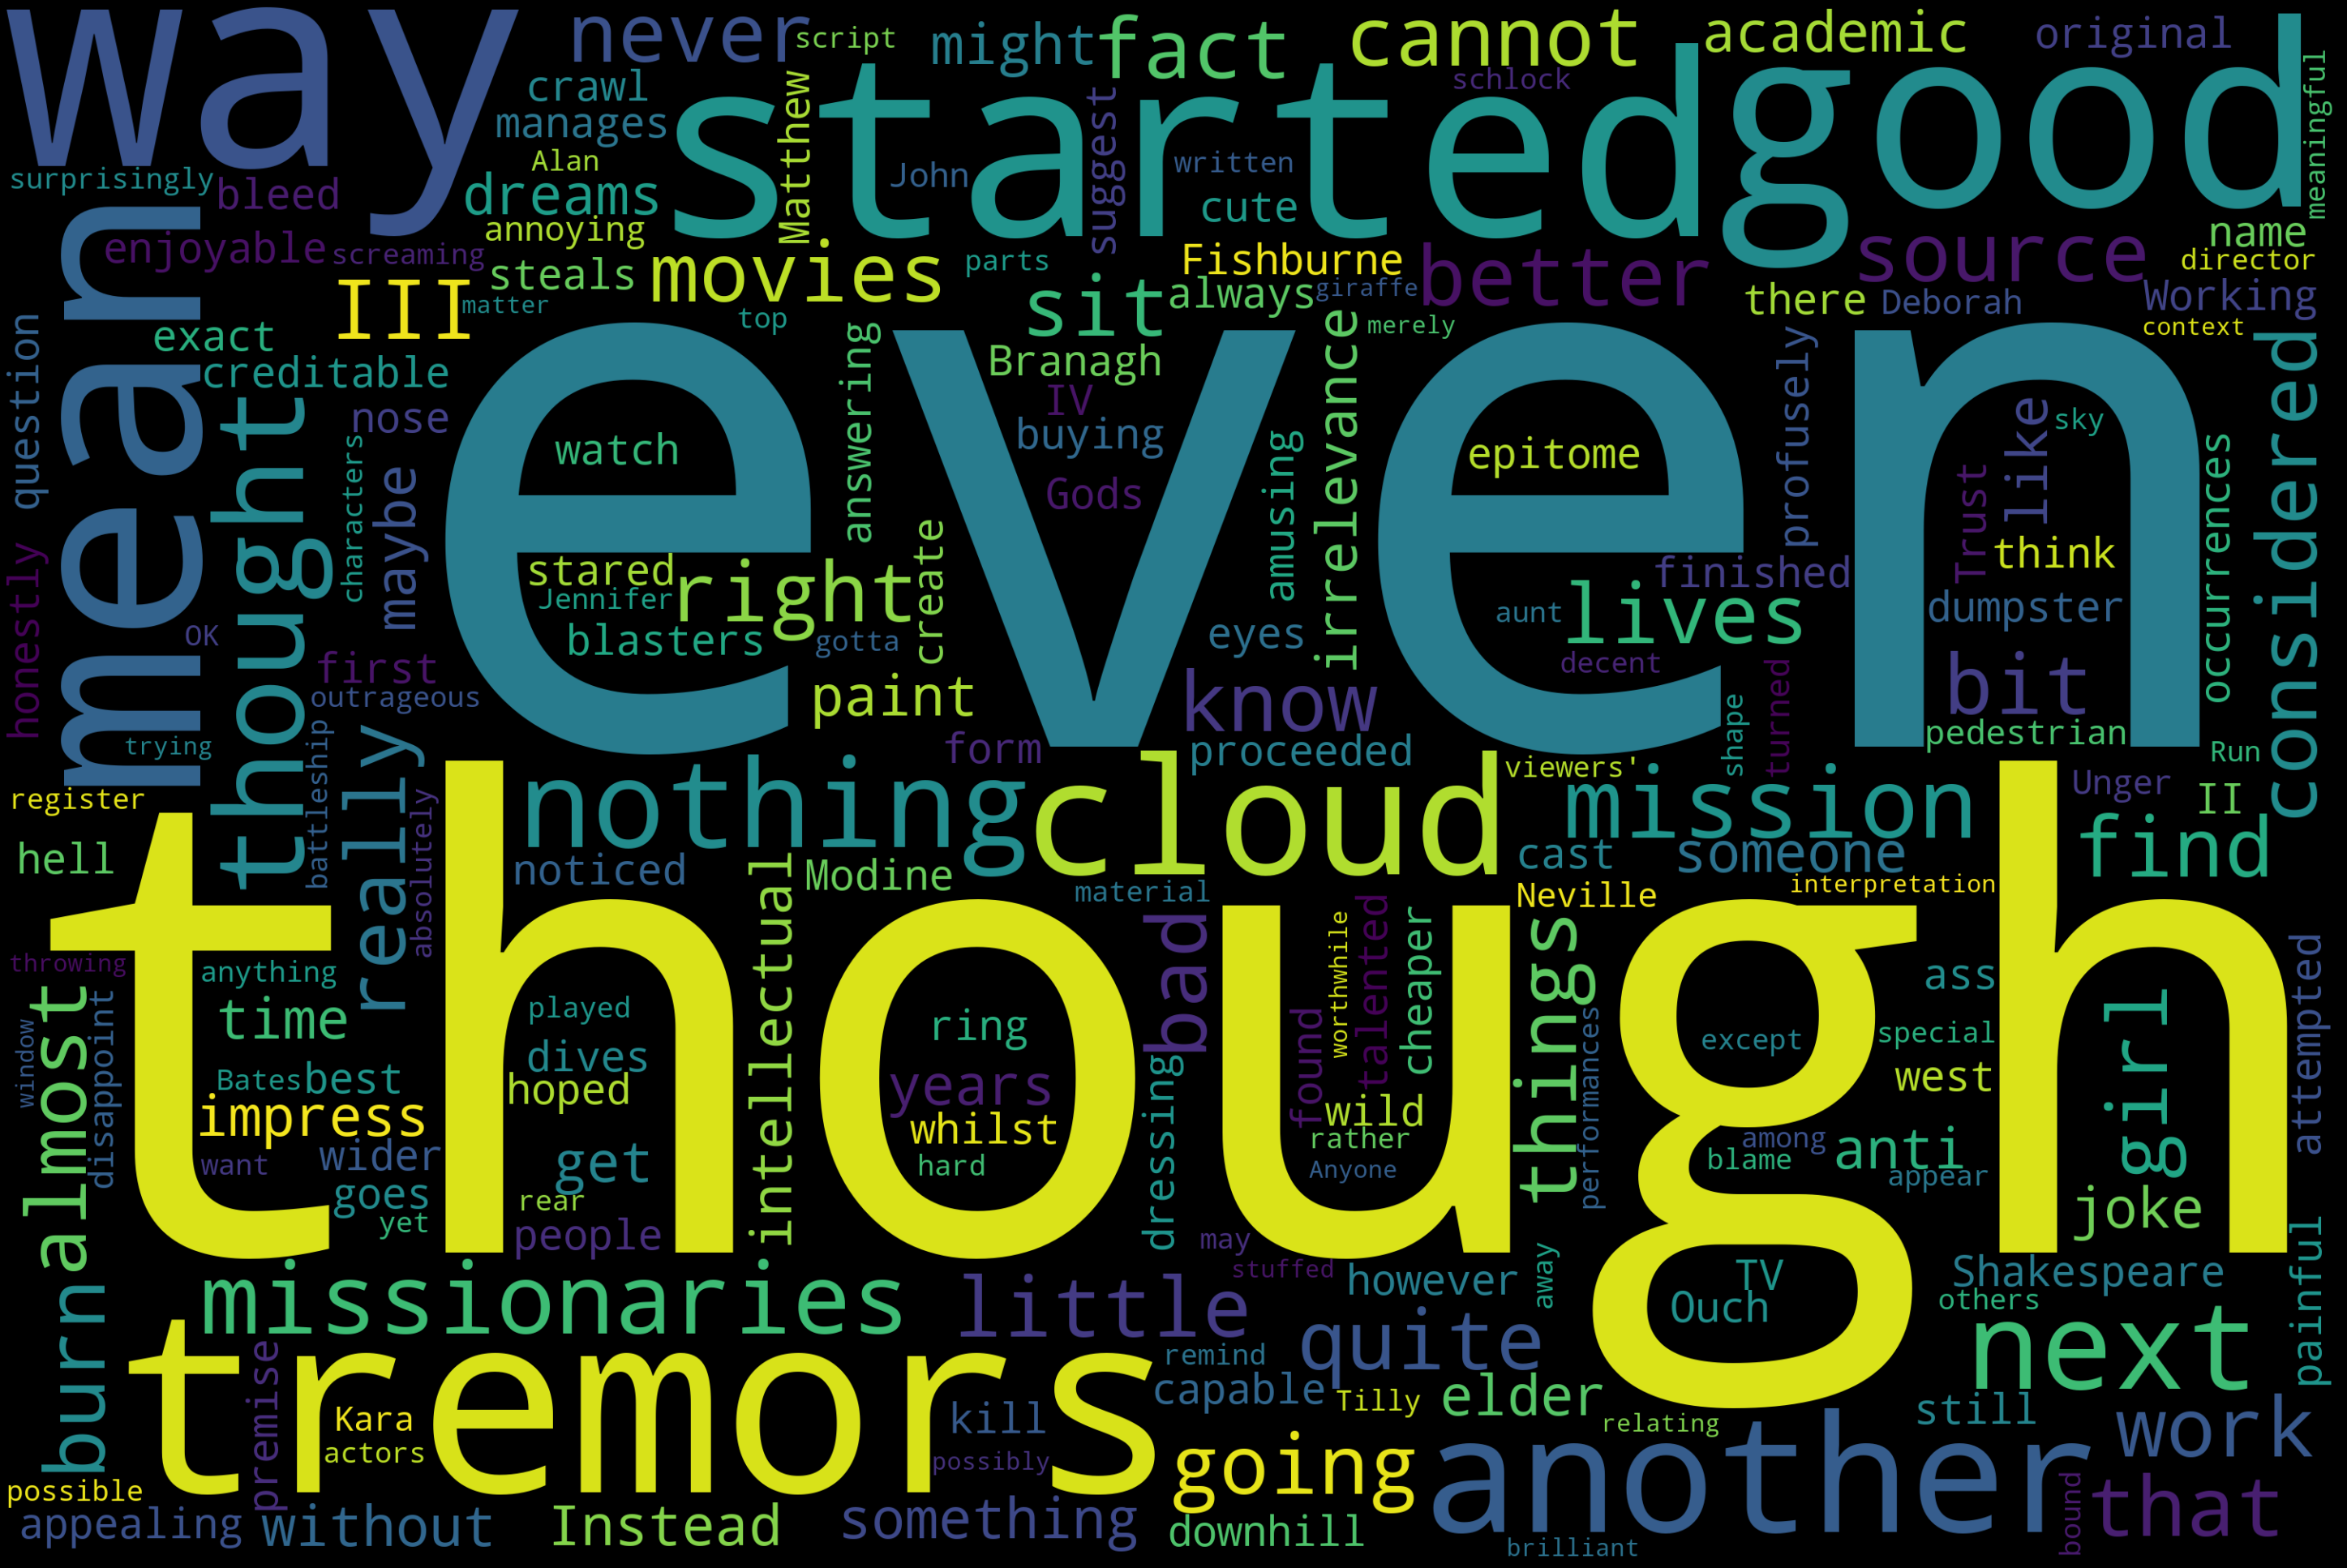

In [108]:
##Wordcloud from negative reviews
text = neg_df.reviews.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = sw).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [96]:
pos_idx = m_reviews[(m_reviews.label == 1)].index[0]
neg_idx = m_reviews[(m_reviews.label == 0)].index[0]

print('Most Negative reviews:', m_reviews.iloc[neg_idx][['reviews']][0])
print()
print('Most Positive reviews:', m_reviews.iloc[pos_idx][['reviews']][0])

Most Negative reviews: Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.  Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.

Most Positive reviews: For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.


# Pre processing and cleanning 

In [22]:
#Stop words
sw = list(set(stopwords.words('english')))

In [107]:
#StopWords definitons
specific_wc = ['Dutcher', 'movie', 'film', 'would', 'us', 'Mormon','one', 'Paris', 'make', 'audience', 'God', 
               'well', 'Danglard', 'Nini']
sw = list(set(stopwords.words('english')))
sw = sw + specific_wc

print(sw[:5])
print(len(sw))

['while', 'here', 'hadn', 'over', 'won']
193


In [125]:
cv = CountVectorizer(stopwords=sw)
bow = cv.fit_transform(m_moviews)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

NameError: name 'CountVectorizer' is not defined

### Pre processing and cleanning functions

In [18]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [19]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [20]:
#Next, we will preprocess our reviews and will store them in a new list as shown below:
X = []
sentences = list(m_reviews['reviews'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [21]:
X[5]

'I saw the movie with two grown children Although it was not as clever as Shrek thought it was rather good In movie theatre surrounded by children who were on spring break there was not sound so know the children all liked it There parents also seemed engaged The death and apparent death of characters brought about the appropriate gasps and comments Hopefully people realize this movie was made for kids As such it was successful although liked it too Personally liked the Scrat '

In [22]:
print (len(X[5]))

480


In [27]:
y = m_reviews['label']
#y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [29]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


In [31]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
49576


Review length: 
Mean 1221.67 words (926.512662)


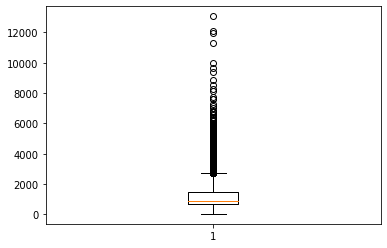

In [34]:
# Summarize review length

print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [98]:
#Divide the train set in tran set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Preparing the Embedding Layer

In [99]:
#use the Tokenizer class from the keras.preprocessing.text module to create a word-to-index dictionary. 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [100]:
#The following script finds the vocabulary size and then perform padding on both train and test set.
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
print (vocab_size)  #unique words
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

91117


In [101]:
#We will use GloVe embeddings to create our feature matrix. 
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/Users/allorens/Desktop/IST736_Text_Mining/Project/data/aclImdb/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [103]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Text Classification with Simple Neural Network

In [104]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          9111700   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 10001     
Total params: 9,121,701
Trainable params: 10,001
Non-trainable params: 9,111,700
_________________________________________________________________
None


In [3]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

NameError: name 'model' is not defined

In [107]:
#To evaluate the performance of the model, we can simply pass the test set to the evaluate method of our model.
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 54us/step


In [108]:
#To check the test accuracy and loss, execute the following script:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5904419144630432
Test Accuracy: 0.7218000292778015


In [1]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

NameError: name 'history' is not defined

# Text Classification with a Convolutional Neural Network

In [110]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [111]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          9111700   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 9,175,957
Trainable params: 64,257
Non-trainable params: 9,111,700
_________________________________________________________________
None


In [112]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 30s 950us/step - loss: 0.5012 - acc: 0.7538 - val_loss: 0.4037 - val_acc: 0.8149
Epoch 2/6
32000/32000 [==============================] - 30s 938us/step - loss: 0.3669 - acc: 0.8371 - val_loss: 0.4152 - val_acc: 0.8081
Epoch 3/6
32000/32000 [==============================] - 30s 930us/step - loss: 0.3284 - acc: 0.8572 - val_loss: 0.3646 - val_acc: 0.8356
Epoch 4/6
32000/32000 [==============================] - 31s 980us/step - loss: 0.2835 - acc: 0.8832 - val_loss: 0.3441 - val_acc: 0.8466
Epoch 5/6
32000/32000 [==============================] - 31s 965us/step - loss: 0.2499 - acc: 0.9035 - val_loss: 0.3391 - val_acc: 0.8501
Epoch 6/6
10000/10000 [==============================] - 5s 489us/step


In [113]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.34208509335517884
Test Accuracy: 0.8489999771118164


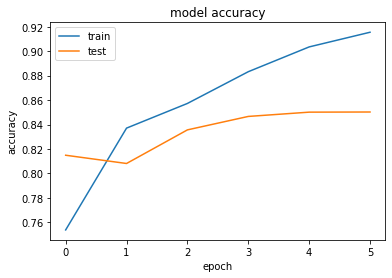

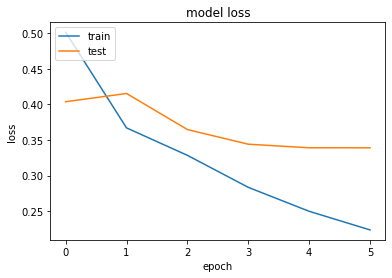

In [114]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

## Text Classification with Recurrent Neural Network (LSTM)

In [118]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [119]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          9111700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 9,229,077
Trainable params: 117,377
Non-trainable params: 9,111,700
_________________________________________________________________
None


In [120]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 139s 4ms/step - loss: 0.5606 - acc: 0.7112 - val_loss: 0.4679 - val_acc: 0.7809
Epoch 2/6
32000/32000 [==============================] - 229s 7ms/step - loss: 0.4455 - acc: 0.7940 - val_loss: 0.4225 - val_acc: 0.8096
Epoch 3/6
32000/32000 [==============================] - 294s 9ms/step - loss: 0.3956 - acc: 0.8208 - val_loss: 0.3985 - val_acc: 0.8313
Epoch 4/6
32000/32000 [==============================] - 235s 7ms/step - loss: 0.3678 - acc: 0.8354 - val_loss: 0.3932 - val_acc: 0.8192
Epoch 5/6
32000/32000 [==============================] - 244s 8ms/step - loss: 0.3472 - acc: 0.8472 - val_loss: 0.3551 - val_acc: 0.8447
Epoch 6/6
10000/10000 [==============================] - 56s 6ms/step


In [121]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.33704512758255006
Test Accuracy: 0.8532000184059143


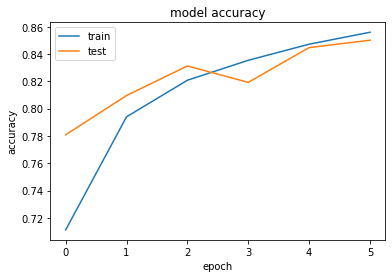

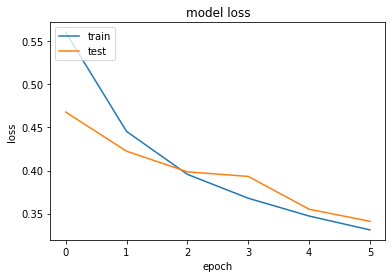

In [122]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()